# HW3-Binary Search Tree

## 前情提要 
在上課的時候看到這次作業內容，一開始以為不會很困難，因為在最一開始有寫過linked list，想說這次可以連pseudocode都不用看

但事情好像沒有想像中簡單，想到要頭破血流了還是跑出來的測值還是錯的，最後去查了pseudocode

在這份作業我會依照4個def拆開講解並附上流程圖，然後說明我的心路歷程

(這次作業的投影片內容大多有python的程式碼，因此我這次比較沒有看投影片內容，反而是不斷自己思考，真的想不到再查pseudocode)

# BST原理
**又叫做二元搜索樹**

**Binary Search Tree是以樹的形式再加以規定**

最上面的那個節點稱為root

* 規則1 :
在這個樹中，每個節點都會有最少0個節點，最多2個節點(分別叫做root.left、root.right)

* 規則2
在Binary Search Tree中，比root小的數要往root的左邊走，比root大的數要往root的右邊走

* 規則3
在走訪的時候也必須像linked list一樣，從root到下面一個一個走訪，不能直接選取其中一個Node

由於有先以大小的比較結果去做二分法，因此再搜尋的時候就不需要去和每個數字比較一次


### 時間複雜度:

**1.search:**

worst: O(n)

average: O(h)

**2.insert:**

worst: O(n)

average: O(h)

**3.delete**

worst: O(n)

average: O(h)


## 初期構想
最一開始我先決定我要寫的順序，我的想法是先寫search、insert，之後再寫delete、modify:

我覺得如果先寫完search，在寫insert的時候我可以用search的概念去找我要insert的位置，那麼我在寫insert的時候就比較輕鬆﹐

如果我寫完search，在寫delete的時候就能更輕鬆，直接search要delete的那個目標，剩下的只需要將刪除的root下面的left、right，往上排列就好，

而當我前面三個def都寫完後，我的modify只需要把原本要換掉的node delete掉，再insert要換上的node就好，

但好像沒這麼簡單，原因會在後面說明。

## Search:
這裡我的想法一開始是，我先以我要尋找的目標為比較的基準，去跟一開始的root比大小，
如果目標小於root的val，我往左邊走，此時使用recursive的方式，把root的位置變成原本的root.left再重新比大小
如果目標大於root的val，我往右邊走，也一樣用recursive的方式，去把root的位置變成原本的root.right再重新比大小
如果目標等於rooo的val，我就回傳這個root的位置，
### 重點一
**這裡我沒有去探討下一個root有沒有left or right，因為我知道如果比到最後都不符合以上三種狀況其中一種，就代表我要search**

**的數並不存在於此樹中，因此直接回傳None就好**
### 重點二
**這裡與insert、delete有一個不同的點是:**

**在inser和delete方面我是以root的left、right去和目標比大小，**

**如果一樣的話就直接回傳root.left / right，否則就重複上述recursive的方法繼續往下**

**但我在seach這裡的回傳方法是以root本身去和目標比大小，如果root本身的val和目標一樣，就直接回傳root**

In [18]:
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
class Solution(object):
    def search(self, root, target):
        if root:
            if target < root.val:
                Solution.search(self,root.left,target)          
            elif target > root.val:
                Solution.search(self,root.right,target)
            elif target==root.val:
                return root
        else:                    
            return None

In [19]:
root=TreeNode(5)
node1=TreeNode(3)
node2=TreeNode(3)
node8=TreeNode(3)
node3=TreeNode(-5)
node4=TreeNode(8)
node5=TreeNode(7)
node6=TreeNode(6)
node7=TreeNode(10)
root.left=node1
root.left.left=node2
root.left.left.left=node8
root.left.left.left.left=node3
root.right=node4
root.right.left=node5
root.right.left.left=node6
root.right.right=node7
print(Solution().search(root,5)==root)
print(Solution().search(root,8)==root.right)

True
False


這裡發現search的目標只有在root的時候會正確，

因此我決定看看root.left、root.right的值為何

In [20]:
print(root.left.val)
print(root.right.val)

3
8


發現其實root的left跟right並沒有變動，

應該是錯在search裡面的某部分，導致沒有回傳root以外的東西。

這時候我回去看我的程式碼並不斷的試，

我認為應該是在我呼叫Solution().search(root.left\root.right,target)這裡出錯

好像沒有將root的left、right路徑回傳

因此我改了一下程式碼，如下

In [21]:
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
class Solution(object):
    def search(self, root, target):
        if root:
            if target < root.val:                                   
                return Solution.search(self,root.left,target)       #修改處   
            elif target > root.val:
                return Solution.search(self,root.right,target)      #修改處
            elif target==root.val:
                return root
        else:                  
            return None

In [22]:
root=TreeNode(5)
node1=TreeNode(3)
node2=TreeNode(3)
node8=TreeNode(3)
node3=TreeNode(-5)
node4=TreeNode(8)
node5=TreeNode(7)
node6=TreeNode(6)
node7=TreeNode(10)
root.left=node1
root.left.left=node2
root.left.left.left=node8
root.left.left.left.left=node3
root.right=node4
root.right.left=node5
root.right.left.left=node6
root.right.right=node7
print(Solution().search(root,5)==root)
print(Solution().search(root,8)==root.right)

True
True


#### 成功了
這裡我懂了，如果要存取root.left、root.right這些node，
在跑recursive的時候也必須要return會去

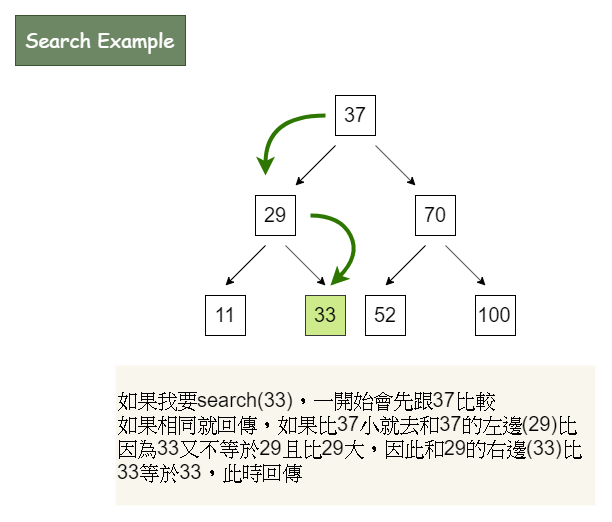

In [23]:
from IPython.display import Image
Image(filename='C:/Users/User/Desktop/HW4_search.png')

## Insert:
在一開始寫的時候我有考慮了如果一開始root不存在的狀況，因此有想了root存在與不存在的限制條件

但當我再往下想的時候我發現了幾個問題導致頭腦有點混亂:

一開始我想的insert是像search一樣，利用root本身去和val比大小，

如果val比較小就去和下一個root比大小(也就是一開始的root.left)，val比較大就去和下一個root比大小(root.right)

如果root本身是None，也就代表比到最後沒有東西了，這時我就可以插入一個TreeNode(val)，然後利用parent的關係找回上面的root。

(下方是最一開始依照想法的程式碼，並不完整)

In [24]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
class Solution(object):
    def insert(self, root, val):
        if root:
            if val < root.val :
                Solution.insert(self,root.left,val)
            elif val > root.val:
                Solution.insert(self,root.right,val)
            else:
                node=TreeNode(val)
                root.parent.left=node
                node.left=root
                return node 
        else:
            node=TreeNode(val)
            node=root.left
            if node.left == None:

SyntaxError: unexpected EOF while parsing (<ipython-input-24-bc4930b1f451>, line 22)

但是後來有幾個原因讓我改變想法:

(1)當我insert一個TreeNode的時候，必須要額外寫parent的程式碼去連結root

(2)我在要判斷是因為最一開始沒有root所以insert一個TreeNode(val)為root，還是因為比到最後沒有root了所以insert一個TreeNode(val)時會搞混

這時候為了釐清我的觀念，我去看了一個影片的Pseudocode


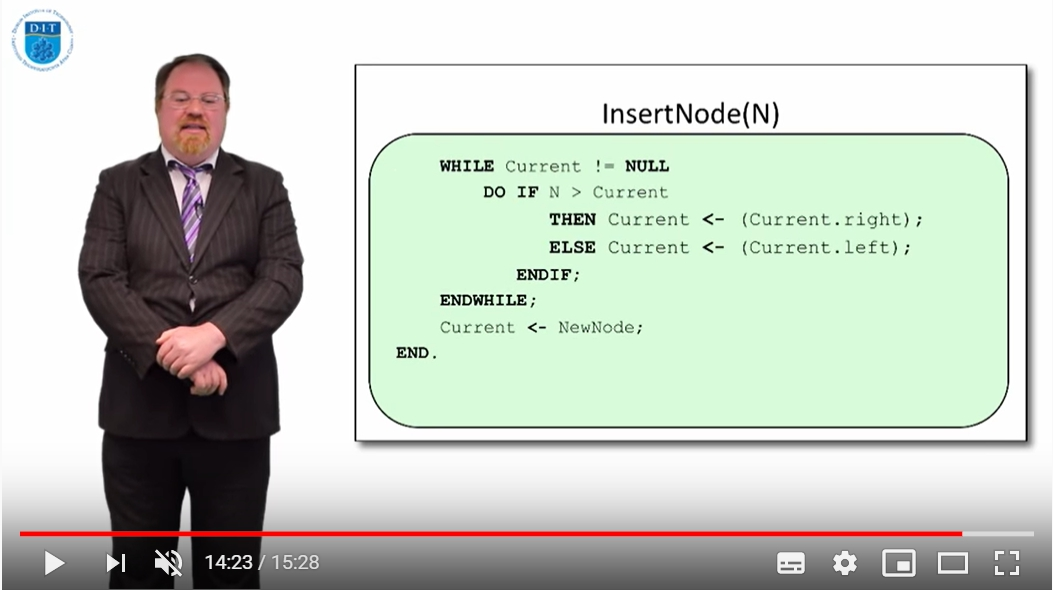

In [25]:
Image(filename='C:/Users/User/Desktop/insert_pseudocode.jpg')

看完之後，釐清了自己原本的觀念，選擇用root.left、root.right的有無當insert的條件以及root.left、root.right大小當作比較的標準，就可以避免掉parent這部分

所以我後來決定改成先root的有無為第一層條件，用root和val比大小為第二層條件，接著以root的left和right的有無當第三層條件:

(EX:)
(1)在root存在的情況下:

如果val比root的值小且root並沒有root.left，那麼我直接insert一個TreeNode(val)為root.left；

如果val比root的值小且root有root.left，那麼我就利用遞迴去和下一個root(最一開始的root.left)重複上述比較動作

如果val比root的值大且root並沒有root.right，那麼我直接insert一個TreeNode(val)為root.right；

如果val比root的值小且root有root.right，那麼我就利用遞迴去和下一個root(最一開始的root.right)重複上述比較動作

(2)如果root不存在:

我就直接insert一個TreeNode(val)為root

以下為我的程式碼

In [26]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
class Solution(object):
    def insert(self, root, val):
        if root:
            if val <= root.val:
                if root.left:
                    return Solution.insert(self, root.left, val)
                else:
                    node = TreeNode(val)
                    root.left = node
                    return root.left
            else:
                if root.right:
                    return Solution.insert(self, root.right, val)
                else:
                    node = TreeNode(val)
                    root.right = node
                    return root.right
        else:
            root=TreeNode(val)
            return root


In [27]:
root=TreeNode(5)
node1=TreeNode(3)
node2=TreeNode(3)
node3=TreeNode(-5)
node4=TreeNode(8)
node5=TreeNode(7)
node6=TreeNode(6)
node7=TreeNode(10)
root.left=node1
root.left.left=node2
root.left.left.left=node3
root.right=node4
root.right.left=node5
root.right.left.left=node6
root.right.right=node7
print(Solution().insert(root,3)==root.left.left.left.right)
print(Solution().insert(root,8)==root.right.left.right)

True
True


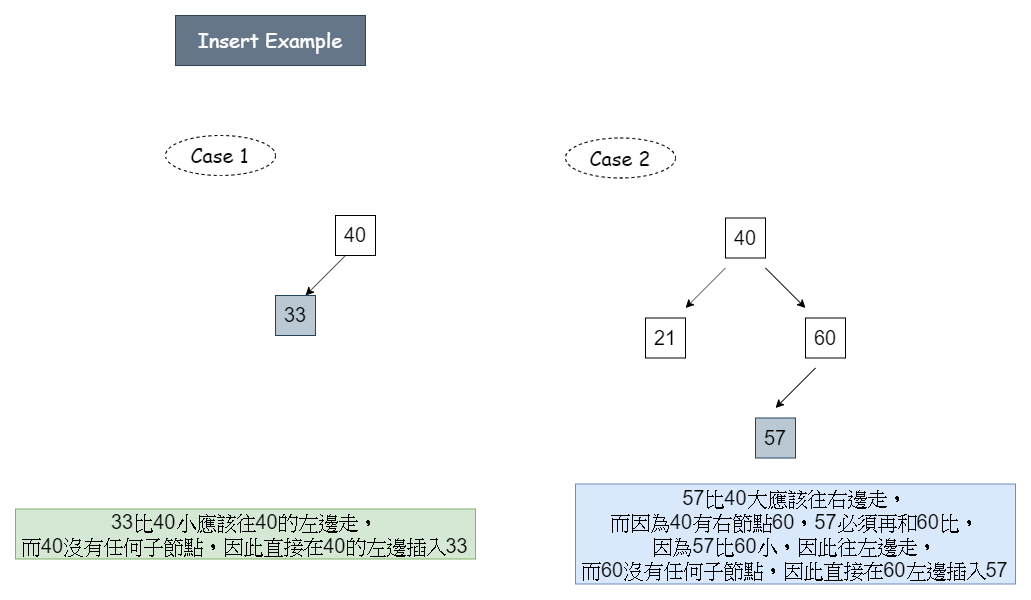

In [28]:
Image(filename='C:/Users/User/Desktop/HW4_insert.png')

## Delete:
(接下來開始是我最痛苦最痛苦的部分了)

(在Delete的部分光是想我就想了大概2天，在第三天決定開始動手打程式，結果打了一整天卻還是沒辦法完成，最後只好去查pseudocode了)

在最一開始我的想法是用search去尋找我要找的目標，但因為一開始我比較不擅長使用呼叫def的方式，因此我把search概念的程式碼搬到了Delete

In [29]:
def delete(self, root, target):
    if target < root.val:
        root.left = Solution.delete(self, root.left, target)
    elif target > root.val:
        root.right = Solution.delete(self, root.right, target)
    elif target == root.val:
        #這裡會有三種狀況
    return root

IndentationError: expected an indented block (<ipython-input-29-ef47f90f5b37>, line 8)

我一開始的構想差不多是這樣，而在上課中老師有說過Delete的部分會比較複雜，因為需要判斷要刪除的TreeNode是否有left、right

在這部分我上網查詢了一下會有哪幾種情況發生:

(1)當node完全沒有子節點(left、right)

(2)當node只有一邊子節點(left or right)

(3)當node有兩個子節點(left and right)

(雖然這個網站就有附上delete的程式碼了，但那時候我並沒有想要直接打程式碼，因此只看了上面觀念的部分)

接下來我開始去想三個狀況發生的時候應該要怎麼處理

(1)沒有子節點，這時候只要直接把這個Node刪除就好

(2)如果只有一邊的子節點，就把這個Node刪除，然後把下面第一個子節點補上(像一開始寫linked list那樣連接他跟這個Node的parent的關係)

(3)同時有兩個子節點:為了達到最小移動步數，我發現有兩種方法可以處理

(3-1)將要刪除的Node的右邊下面所有節點中，找出最小的，然後將Node刪除，將那個最小的Node移上去，這樣可以確保其他Node不須更動

(3-2)或是將要刪除的Node的左邊下面所有節點中，找出最大的，然後將Node刪除，將那個最大的Node移上去，這樣也可以確保其他Node不須更動

(這是我的口訣:找右邊最小的 或 找左邊最大的)

這些都想好之後就是開始打程式碼的時候了，但沒想到才踏出這步沒多久就被打敗了

原本以為最難的地方會是在刪除後要重新排列的部分，沒想到我在這之前就卡關了

我嘗試了del的方式，也嘗試過像linked list中那樣delete的方式，

不管怎麼試就是沒辦法把要刪除的那個Node給刪掉，甚至連一段看似有邏輯的程式碼都打不出來，

就這樣卡了一天之後，真的受不了了，我上網查了一段pseudocode。

看完之後我才明白自己的錯誤，我太過於想利用一個def直接寫完delete，而導致我在進行類似search的動作後，並沒辦法進行刪除

因此我照著pseudocode的邏輯打出了一段程式碼，

先利用delete找到我要刪除的位置，再回傳到delete_by這裡去做刪除以及排列的動作

In [30]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
class Solution(object):
    def delete(self, root, target):
        if target < root.val:
            root.left = Solution.delete(self, root.left, target)
        elif target > root.val:
            root.right = Solution.delete(self, root.right, target)
        elif target == root.val:
            return Solution.delete_by(self, root)
    def delete_by(self, root):
        if root.left:
            if root.right:
                min_node = Solution.get_min(self, root.right)
                root.val = min_node.val
                root.right = Solution.delete(self, root.right, min_node.val)
                return root
            else:
                return root.left
        else:
            if root.right:
                return root.right
            else:
                return None
    def get_min(self, c_root):

        if c_root.left:
            return Solution.get_min(self, c_root.left)
        else:
            return c_root

In [31]:
root=TreeNode(5)
node1=TreeNode(3)
node2=TreeNode(3)
node3=TreeNode(-5)
node4=TreeNode(8)
node5=TreeNode(7)
node6=TreeNode(6)
node7=TreeNode(10)
root.left=node1
root.left.left=node2
root.left.left.left=node3
root.right=node4
root.right.left=node5
root.right.left.left=node6
root.right.right=node7
Solution().delete(root,3)
print(root.left.val)
print(root.left.left.val)

3
-5


這裡我使用的方法是get_min，也就是我說的找右邊中最小的那個數出來，

如果在要刪除的節點有兩個子節點時，選擇要刪除的節點右邊子節點中最小的那個出來進行調整

我發現了可以成功地將我要刪除的目標刪除，但卻沒辦法像規定那樣將所有相同的值刪除

這時候我的想法是，那麼我必須先有一個辦法知道會有幾次重複的值，這樣才能重複執行相同次數的delete

這時候我想到在上課有提到的走訪，可以走訪tree中的每一個數，那麼我只要知道走訪過程中有幾個與target相同的數就可以了

所以我先寫了走訪的程式碼(作業有規定要用preorder)，因此我先上網查了一下各種走訪的差別

在理解了每種走訪不同的差異之後，我往下看了一下程式碼

(這裡我看的是其他的的程式碼，因為其實程式碼很短，而且走訪的概念我一開始就了解，只是為了怕自己觀念有錯所以看了一下python以外的程式碼)

確認與自己的概念相同後，很輕易地就寫出了走訪的程式碼

In [32]:
def Preorder(self, root, target, a):
    if root:
        a.append(root.val)
        Solution.Preorder(self, root.left, target, a)
        Solution.Preorder(self, root.right, target, a)

上面的程式碼是我已經改過的了，為了要知道裡面的數有幾個與要刪除的target相同，

因此我把走訪的結果先全部的append到一個空的list，

之後我只要利用迴圈的方式去看是否相同就好

接著我修改了原本的delete程式碼

In [33]:
def delete(self, root, target):
    a = []
    Solution.Preorder(self, root, target, a)
    for i in a:
        if i == target:  # 用改用get_Max
            if target < root.val:
                root.left = Solution.delete(self, root.left, target)
            elif target > root.val:
                root.right = Solution.delete(self, root.right, target)
            elif target == root.val:
                return Solution.delete_by(self, root)
    return root

這裡我呼叫了Preorder來建立一個有走訪過程的list，

然後利用迴圈去判斷走訪的過程是否有與target相同的值，

如果相同我就進行原本刪除的程式碼一次，

這樣就可以重複執行刪除的動作

In [34]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
class Solution(object):
    def insert(self, root, val):
        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)
        """
        if root:
            if val <= root.val:
                if root.left:
                    return Solution.insert(self, root.left, val)
                else:
                    node = TreeNode(val)
                    root.left = node
                    return root.left
            else:
                if root.right:
                    return Solution.insert(self, root.right, val)
                else:
                    node = TreeNode(val)
                    root.right = node
                    return root.right
        else:
            root=TreeNode(val)
            return root

    def delete(self, root, target):
        a = []
        Solution.Preorder(self, root, target, a)
        for i in a:
            if i == target:  # 用改用get_Max
                if target < root.val:
                    root.left = Solution.delete(self, root.left, target)
                elif target > root.val:
                    root.right = Solution.delete(self, root.right, target)
                elif target == root.val:
                    return Solution.delete_by(self, root)
        return root

    def delete_by(self, root):
        if root.left:
            if root.right:
                min_node = Solution.get_min(self, root.right)
                root.val = min_node.val
                root.right = Solution.delete(self, root.right, min_node.val)
                return root
            else:
                return root.left
        else:
            if root.right:
                return root.right
            else:
                return None

    def get_min(self, c_root):
        if c_root.left:
            return Solution.get_min(self, c_root.left)
        else:
            return c_root
    def Preorder(self, root, target, a):
        if root:
            a.append(root.val)
            Solution.Preorder(self, root.left, target, a)
            Solution.Preorder(self, root.right, target, a)

In [35]:
root=TreeNode(5)
node1=TreeNode(3)
node2=TreeNode(3)
node3=TreeNode(-5)
node4=TreeNode(8)
node5=TreeNode(7)
node6=TreeNode(6)
node7=TreeNode(10)
root.left=node1
root.left.left=node2
root.left.left.left=node3
root.right=node4
root.right.left=node5
root.right.left.left=node6
root.right.right=node7
Solution().delete(root,3)
print(root.left.val)
print(root.left.left)

-5
None


# 成功了!!!!!!!!感動啊!
(後來發現，在寫程式的時候忘記preorder，所以應該要改成get_MAX，取要刪除的node的左邊的子節點以下的最大節點)

In [36]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
class Solution(object):        
    def delete(self, root, target):
        a=[]
        Solution.Preorder(self,root,target,a)
        for i in a:
            if i==target:             
                if target<root.val:
                    root.left = Solution.delete(self,root.left,target)
                elif target>root.val:
                    root.right = Solution.delete(self,root.right,target)
                elif target==root.val:
                    return Solution.delete_by(self,root)
        return root

    def delete_by(self,root):
        if root.left:
            if root.right:
                Max_node = Solution.get_Max(self,root.left)
                root.val=Max_node.val
                root.left=Solution.delete(self,root.left,Max_node.val)
                return root
            else:
                return root.left
        else:
            if root.right:
                return root.right
            else:
                return None
    def get_Max(self,c_root):
        if c_root.right:
            return Solution.get_Max(self,c_root.right)
        else:
            return c_root
    def Preorder(self, root, target, a):
        if root:
            a.append(root.val)
            Solution.Preorder(self, root.left, target, a)
            Solution.Preorder(self, root.right, target, a)

In [37]:
root=TreeNode(5)
node1=TreeNode(3)
node2=TreeNode(3)
node3=TreeNode(-5)
node4=TreeNode(8)
node5=TreeNode(7)
node6=TreeNode(6)
node7=TreeNode(10)
root.left=node1
root.left.left=node2
root.left.left.left=node3
root.right=node4
root.right.left=node5
root.right.left.left=node6
root.right.right=node7
Solution().delete(root,5)
print(root.left.val)
print(root.left.val)
print(root.left.left.val)

3
3
-5


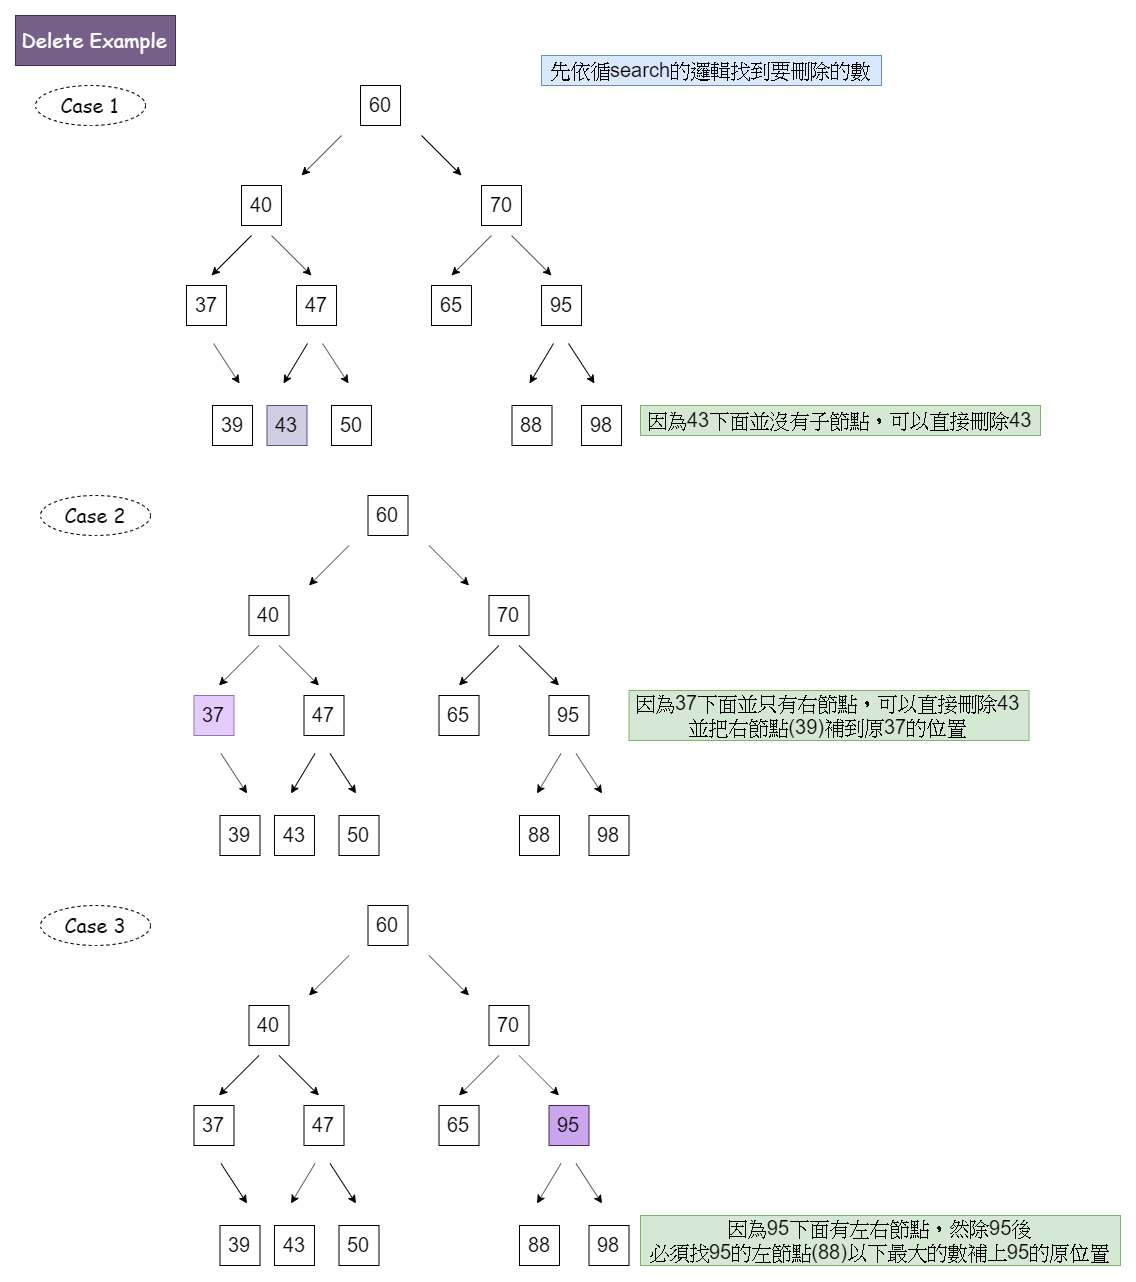

In [38]:
Image(filename='C:/Users/User/Desktop/HW4_delete.png')

## Modify

最後剩下modify的部分了，我原本是覺得可以很簡單的就解決的!

因為我一開始的想法是把要替換掉的數字delete，

然後把要代替上的數字insert就好了。

果然事情並沒有我想像中的簡單，

因為只要把一個很小的數換成一個很大很大的數(甚至很小的數還有重複值)

這樣很容易造成modify出來的Tree的height超過原本的Tree的

### 開始思考如何可以取得一個最小height的Tree

因為不太知道助教說「不會丟無法整理出比原樹height低或等於的樹」的意思，這裡我有以下幾個想法:

(1)可能不會有太多重覆與極端值，那麼我可以直接先用delete要換掉的目標並排列，之後直接insert:

這裡我有在紙上稍微畫過，我發現只要有很多重複值，或是用很大的數去替換很小的數時，很容易發生height超過的情況

(2)想到上課有教過紅黑樹，但既然這次的作業叫原創的BST，我認為應該就不會用到紅黑樹的方法

(3)這是我前面在查詢BST資料的時候，無意間瞄過的一個方法，他把一個list先依照大小排列，接著選index=中間的那個數作為Tree的root，

並依照某些特定規則insert

後來我依照(3)的想法去想modify，我認為，如果我利用走訪先將走訪過程的數都append到一個list，接著把要換掉的數與要插入的新的數在list中交換，

那麼我再依照(3)的規則去排列，這樣出來的Tree的height應該不會超過原始的Tree

(以下我會把程式分成部分講解，因此不會顯示完整能跑的程式碼)

### 步驟1.將走訪的過程append到一個list

這裡根據規定使用Preorder，並將每個數丟入我新建的list中

因為是在別的function呼叫，所以我把nums這個list建在其他的function當中

In [39]:
def Preorder_for_modify(self, root, target, new_val, nums):
    if root:
        nums.append(root.val)
        Solution.Preorder_for_modify(self, root.left, target, new_val, nums)
        Solution.Preorder_for_modify(self, root.right, target, new_val, nums)

當走訪過程已經append到list中後，我要先把欲換掉的數值與欲換入的數值交換，

我用迴圈的方始去看list中的每個元素，只要跟我要換掉的target相同，我就把那個位置的數值改為new_val

如下

In [40]:
for j in range(0, len(nums)):
    if nums[j] == target:
        nums[j]=new_val

NameError: name 'nums' is not defined

接著我必須將這個list裡面的元素依照大小排列，從小到大，

我使用的方法是用現在這個數去和下個位置的數比大小，如果現在的數比較大，就和下一個數交換位置

成功之後回傳這個function的list

In [41]:
for k in range(len(nums)):
    if k + 1 < len(nums) :
        if nums[k] > nums[k + 1]:
            nums[k], nums[k + 1] = nums[k + 1], nums[k]
return nums

NameError: name 'nums' is not defined

以下是這個function完整的程式碼

In [42]:
def Preorder_for_modify(self, root, target, new_val, nums):
    if root:
        nums.append(root.val)
        Solution.Preorder_for_modify(self, root.left, target, new_val, nums)
        Solution.Preorder_for_modify(self, root.right, target, new_val, nums)
    for j in range(0, len(nums)):
        if nums[j] == target:
            nums[j]=new_val
    for k in range(len(nums)):
        if k + 1 < len(nums) :
            if nums[k] > nums[k + 1]:
                nums[k], nums[k + 1] = nums[k + 1], nums[k]
    return nums

### 步驟2.將list排列成一個Tree

In [43]:
def rebuild_bst(self, nums, center):
    if not nums:
        return None
    else:
        root_index = int(len(nums) / 2)
        new_root = Solution.insert_for_modify(self, center, nums[root_index])
        Solution.rebuild_bst(self, nums[:root_index], center)
        Solution.rebuild_bst(self, nums[root_index+1:], center)

這是以規則寫出來的程式碼，我不斷取某段list中的中心，而中心的位置我定為len(nums)/2(取整數部分)，

而當我取完一個中心後，我必須再去區分這個中心以左跟以右的list的範圍，

中心以左是從index=0到index=中心位置，以右是從index=中心位置+1到最後

然後不斷重複去新的區間取出新的中心點，inset到tree中，

這裡我的root一直都設定為我一開始切一半取出的中心點位置，這樣再insert的時候才不會錯亂

In [44]:
def insert_for_modify(self, root, val):
    if root==None:
        root = TreeNode(val)
        return root
    else:
        if val <= root.val:
            if root.left:
                return Solution.insert_for_modify(self, root.left, val)
            else:
                node = TreeNode(val)
                root.left = node
                return root.left
        else:
            if root.right:
                return Solution.insert_for_modify(self, root.right, val)
            else:
                node = TreeNode(val)
                root.right = node
                return root.right


這是我為了modify寫的insert，跟上面原始的insert差不多，

只是後來寫來怕在修改modify時不小心改到原始的insert，

因此寫了一個叫insert_for_modify

**這裡呼叫自己寫的insert是因為我在insert的部分有把val=root.val要擺左邊的狀況寫進去**

In [45]:
def modify(self, root, target, new_val):
    """
    :type root: TreeNode
    :type target: int
    :type new_val: int
    :rtype: None Do not return anything, modify nodes(maybe more than more) in-place instead.(cannot search())
    """
    b = []
    b = Solution.Preorder_for_modify(self, root, target, new_val, b)
    root_index = int(len(b)/2)
    root1 = TreeNode(b[root_index])
    Solution.rebuild_bst(self, b[:root_index], root1)
    Solution.rebuild_bst(self, b[root_index+1:], root1)
    return root1

這裡是我上面所說的部份，在另一個def中建Preorder_for_modify要用到的list，

然後呼叫Preorder_for_modify，把走訪過的數字丟進去。

因為我modify的過程是將原本的Tree整個打掉，因此我必須先建一個新的root，

而這裡我建的root就是我一開始在rebuild_bst所使用到的中間值

然後呼叫rebuild_bst讓他去做後續的動作

**這裡要return的是新設的root，否則把Tree排好了回傳另一個root也沒用**

In [46]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
class Solution(object):
    def modify(self, root, target, new_val):
        b = []
        b = Solution.Preorder_for_modify(self, root, target, new_val, b)
        root_index = int(len(b)/2)
        root1 = TreeNode(b[root_index])
        Solution.rebuild_bst(self, b[:root_index], root1)
        Solution.rebuild_bst(self, b[root_index+1:], root1)
        return root1
    def Preorder_for_modify(self, root, target, new_val, nums):
        if root:
            nums.append(root.val)
            Solution.Preorder_for_modify(self, root.left, target, new_val, nums)
            Solution.Preorder_for_modify(self, root.right, target, new_val, nums)
        for j in range(0, len(nums)):
            if nums[j] == target:
                nums[j]=new_val
        for k in range(len(nums)):
            if k + 1 < len(nums) :
                if nums[k] > nums[k + 1]:
                    nums[k], nums[k + 1] = nums[k + 1], nums[k]
        return nums
    def insert_for_modify(self, root, val):
        if root==None:
            root = TreeNode(val)
            return root
        else:
            if val <= root.val:
                if root.left:
                    return Solution.insert_for_modify(self, root.left, val)
                else:
                    node = TreeNode(val)
                    root.left = node
                    return root.left
            else:
                if root.right:
                    return Solution.insert_for_modify(self, root.right, val)
                else:
                    node = TreeNode(val)
                    root.right = node
                    return root.right

    def rebuild_bst(self, nums, center):
        if not nums:
            return None
        else:
            root_index = int(len(nums) / 2)
            new_root = Solution.insert_for_modify(self, center, nums[root_index])
            Solution.rebuild_bst(self, nums[:root_index], center)
            Solution.rebuild_bst(self, nums[root_index+1:], center)

In [47]:
root=TreeNode(5)
node1=TreeNode(3)
node2=TreeNode(3)
node3=TreeNode(-5)
node4=TreeNode(8)
node5=TreeNode(7)
node6=TreeNode(6)
node7=TreeNode(10)
root.left=node1
root.left.left=node2
root.left.left.left=node3
root.right=node4
root.right.left=node5
root.right.left.left=node6
root.right.right=node7
root2=Solution().modify(root,3,10)


In [48]:
class bbb(object):
    def Preorder(self,root): 
        if root: 
            print(root.val)
            bbb.Preorder(self,root.left) 
            bbb.Preorder(self,root.right)

In [49]:
bbb().Preorder(root2)

8
6
5
-5
7
10
10
10


# 終於完成了阿阿阿阿阿阿阿!

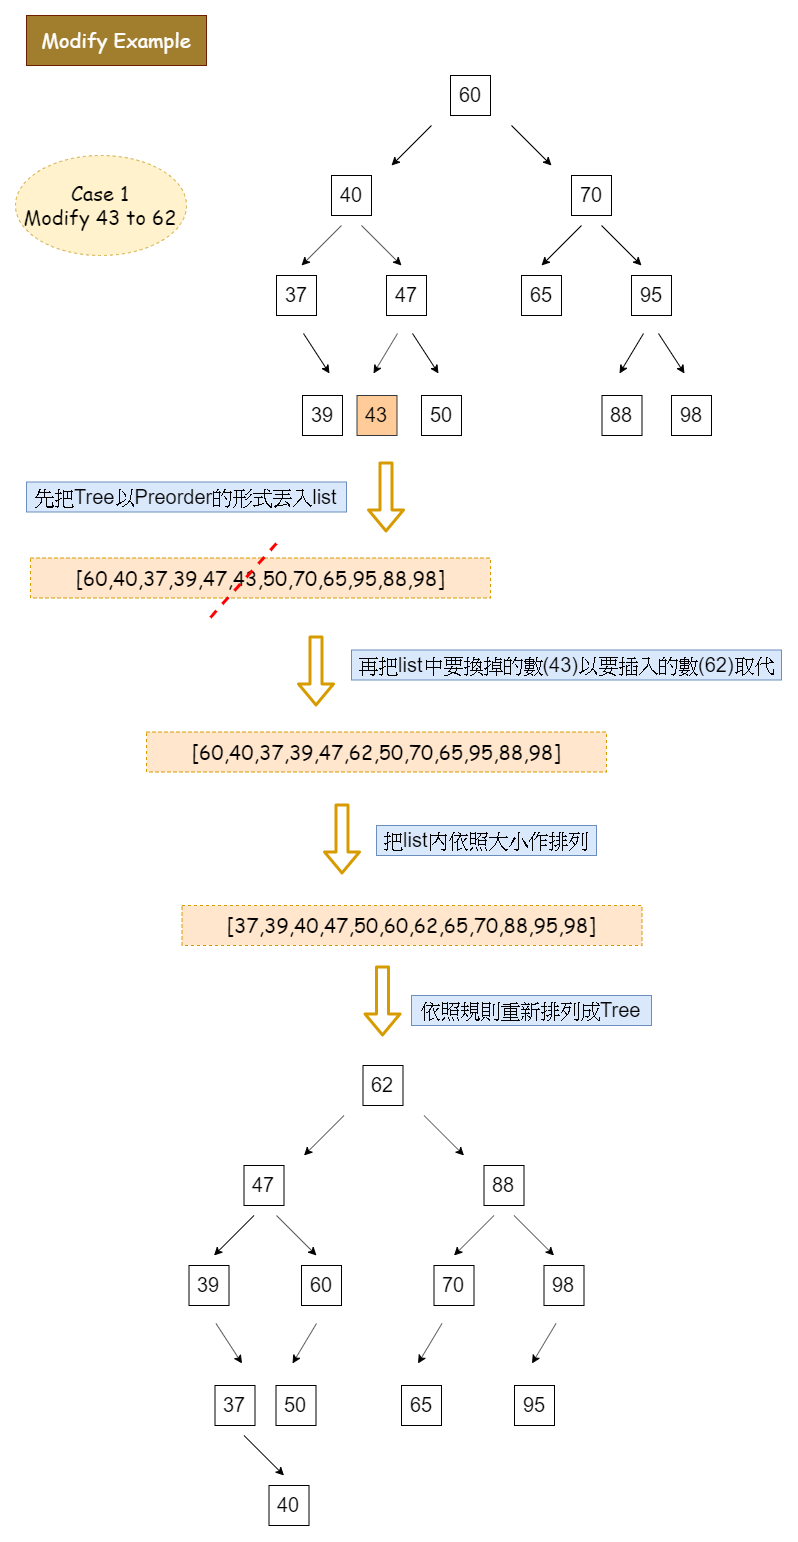

In [50]:
Image(filename='C:/Users/User/Desktop/HW4_modify.png')

參考資料:

1.https://www.geeksforgeeks.org/complexity-different-operations-binary-tree-binary-search-tree-avl-tree/

2.https://www.youtube.com/watch?v=zQTYCVscelo

3.https://www.geeksforgeeks.org/binary-search-tree-set-2-delete/

4.https://stackoverflow.com/questions/12253746/pseudo-code-and-conditions-for-deleting-a-node-in-binary-search-tree

5.https://www.geeksforgeeks.org/tree-traversals-inorder-preorder-and-postorder/

6.https://www.geeksforgeeks.org/sorted-array-to-balanced-bst/

### 作業心得:

這次作業真的是看似簡單一點也不簡單，魔鬼永遠藏在細節裡，

每一部分的程式幾乎都分別花了1-2天去想，又花了1-2天去打，再花了1-2天去debug，

寫完後再去看看投影片其他同學問的問題，有時候發現自己寫的又有錯誤真的是痛苦。

寫作業的時候常常會感覺這次作業的規則有點訂得太清楚，因為我記得上課有說過bst每個人邏輯不同，寫出來的都不一樣，所以長相應該也會不一樣

但根據投影片上那些規則，除了一兩個要重新設root的部分外，其他邏輯比較沒有改變的空間，所以沒辦法照自己原本設想的去寫。

在寫完整份作業後，這次除了原本寫出程式的成就感以外，更多的是疲倦，

經歷的兩個禮拜，每天四點才睡得摧殘，感覺老了不少。